# Setting Up the Environment

In [40]:
import gym
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Create the environment
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="4x4")
# environment = gym.make("FrozenLake-v1")


# Initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 10000   # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001 # Fixed amount to decrease
stats_every = 100  # Frequency to record statistics

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Implementing Q Learning (Training)

In [41]:
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

# Training
rewards = []
for episode in range(episodes):
    state = environment.reset()
    episode_reward = 0
    if isinstance(state, (list, tuple, str)):
        state = state[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        if rnd < epsilon:
            action = environment.action_space.sample()
        else:
            action = np.argmax(qtable[state])
             
        new_state, reward, done, info, _ = environment.step(action)
        
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state
        episode_reward += reward

        if reward:
            outcomes[-1] = "Success"

    # Update epsilon after each episode
    epsilon = max(epsilon - epsilon_decay, 0)
    rewards.append(reward)
    ep_rewards.append(episode_reward)
    if not episode % stats_every:
        average_reward = sum(ep_rewards[-stats_every:]) / stats_every
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-stats_every:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-stats_every:]))
        # print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

1   HIToolbox                           0x00000001a67b85c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x00000001a67b8188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x00000001a675b310 SetMenuBarObscured + 372
4   HIToolbox                           0x00000001a675aee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x00000001a6754fcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x00000001a671bcd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x00000001a675496c AcquireEventFromQueue + 432
8   HIToolbox                           0x00000001a6743c84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x00000001a6743b2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x00000001a02f0424 _DPS

# Learning Curve (rewards over episodes)

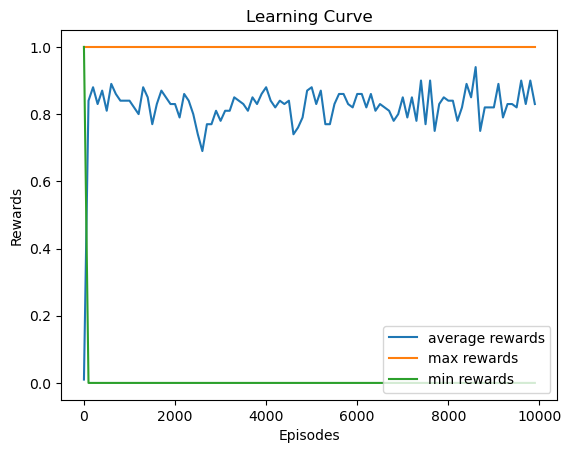

In [36]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Learning Curve')
plt.show()

# Q Table & Outcomes



Q-table after training:
[[5.76759017e-02 5.21424658e-03 5.45574312e-03 5.21242470e-03]
 [1.92486140e-03 1.73572002e-03 1.80181976e-03 2.38483563e-02]
 [1.36408437e-03 1.47999412e-03 1.14255671e-03 2.30963244e-02]
 [7.28886184e-04 1.12634070e-03 9.86052166e-04 1.48277732e-02]
 [8.73408183e-02 5.56786696e-03 5.94287453e-03 4.36275248e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.07529649e-02 1.28756782e-04 1.16247992e-04 1.12109499e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.77155118e-03 5.99174809e-03 6.43796577e-03 1.66457927e-01]
 [2.66990146e-02 2.34927300e-01 1.58561363e-02 1.61891392e-02]
 [1.13774119e-01 9.24732409e-03 9.62110608e-03 7.36373613e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.93443123e-02 2.96250638e-02 5.47357967e-01 5.69521218e-02]
 [9.60608639e-02 9.33954365e-01 8.07923622e-02 8.65574447e-02]
 [0.00000000e+00 0.00000000e+0

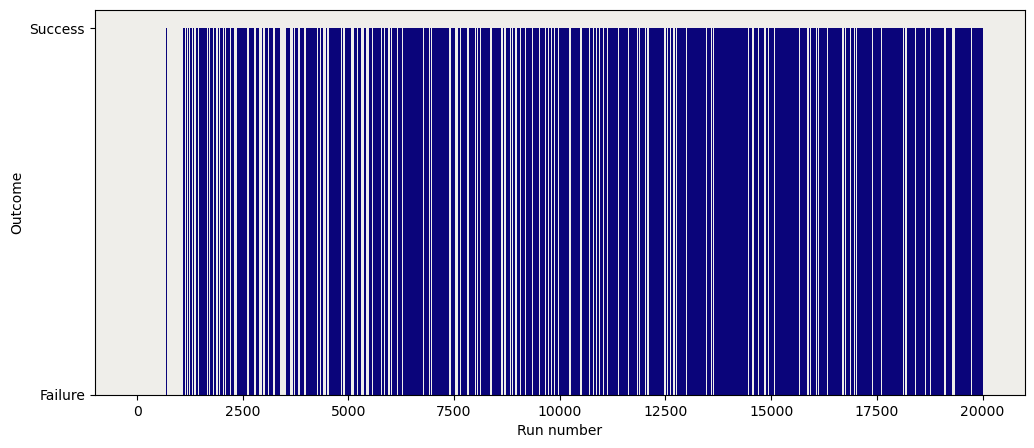

In [37]:
print()
print('Q-table after training:')
print(qtable)


# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

# Evaluating the Performance

In [38]:
def evaluate_q_learning(env, q_table, num_episodes=1000):
    total_reward = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            if isinstance(state, (list, tuple, str)):
                state = state[0]
            action = np.argmax(q_table[state])  # Select action based on Q-table
            next_state, reward, done, info, _ = env.step(action)
            state = next_state
            total_reward += reward
    return total_reward / num_episodes

# Assuming q_table is the Q-table obtained after training
average_reward = evaluate_q_learning(environment, qtable)
print(f'Average reward per episode: {average_reward}')

Average reward per episode: 0.832
